<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pivot-Tables" data-toc-modified-id="Pivot-Tables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pivot Tables</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# pivot/unpivot

In [2]:
df = pd.read_csv('data/life_expectancy_years.csv')

In [4]:
df.head(10)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,"28,2","28,2","28,2","28,2","28,2","28,2","28,1","28,1","28,1",...,"55,7","56,2","56,7","57,2","57,7","57,8","57,9",58,"58,4","58,7"
1,Albania,"35,4","35,4","35,4","35,4","35,4","35,4","35,4","35,4","35,4",...,"75,9","76,3","76,7",77,"77,2","77,4","77,6","77,7","77,9",78
2,Algeria,"28,8","28,8","28,8","28,8","28,8","28,8","28,8","28,8","28,8",...,"76,3","76,5","76,7","76,8",77,"77,1","77,3","77,4","77,6","77,9"
3,Angola,27,27,27,27,27,27,27,27,27,...,"59,3","60,1","60,9","61,7","62,5","63,3",64,"64,7","64,9","65,2"
4,Antigua and Barbuda,"33,5","33,5","33,5","33,5","33,5","33,5","33,5","33,5","33,5",...,"76,9","76,8","76,9",77,"77,3","77,1","77,2","77,3","77,4","77,6"
5,Argentina,"33,2","33,2","33,2","33,2","33,2","33,2","33,2","33,2","33,2",...,"75,7","75,8",76,"76,1","76,2","76,4","76,5","76,7","76,8",77
6,Armenia,34,34,34,34,34,34,34,34,34,...,73,"73,3","73,8","74,3",75,"75,4","75,4","75,7","75,8",76
7,Australia,34,34,34,34,34,34,34,34,34,...,"81,8",82,"82,2","82,3","82,5","82,6","82,6","82,5","82,7","82,9"
8,Austria,"34,4","34,4","34,4","34,4","34,4","34,4","34,4","34,4","34,4",...,"80,3","80,5","80,7","80,9","81,1","81,3","81,4","81,5","81,7","81,8"
9,Azerbaijan,"29,2","29,2","29,2","29,2","29,2","29,2","29,2","29,2","29,2",...,"68,8","69,1","69,9","70,2",71,"71,5","71,8","72,1","72,2","72,3"


In [ ]:
# explore data

In [11]:
# melt the normalized file, hold the country name and code variables, rename the melted columns
# id_vars, var_name, value_name

df2 = df.melt(id_vars='country', var_name='year', value_name='life_expectancy')
df2

,country,year,life_expectancy
0,Afghanistan,1800,"28,2"
1,Albania,1800,"35,4"
2,Algeria,1800,"28,8"
3,Angola,1800,27
4,Antigua and Barbuda,1800,"33,5"
...,...,...,...
40291,Venezuela,2018,"75,9"
40292,Vietnam,2018,"74,9"
40293,Yemen,2018,"67,1"
40294,Zambia,2018,"59,5"


In [32]:
df2.life_expectancy = df2.life_expectancy.str.replace(',','.').astype('float')

In [ ]:
# pivot the data by years
# index, columns, values

In [45]:
df3 = df2.pivot_table(index='country', columns='year', values='life_expectancy')
df3

year,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9
3,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,59.3,60.1,60.9,61.7,62.5,63.3,64.0,64.7,64.9,65.2
4,Antigua and Barbuda,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,76.9,76.8,76.9,77.0,77.3,77.1,77.2,77.3,77.4,77.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Venezuela,32.2,32.2,32.2,32.2,32.2,32.2,32.2,32.2,32.2,...,75.0,75.4,75.4,75.3,75.4,75.5,75.5,75.5,75.7,75.9
180,Vietnam,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,...,72.8,73.1,73.3,73.6,73.8,74.1,74.3,74.5,74.7,74.9
181,Yemen,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,...,67.0,67.5,67.7,67.9,68.4,68.4,67.2,66.7,66.9,67.1
182,Zambia,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,...,50.7,52.0,53.2,54.5,55.7,57.0,58.1,58.8,59.1,59.5


In [36]:
df3.reset_index(inplace=True)

## Explore visually

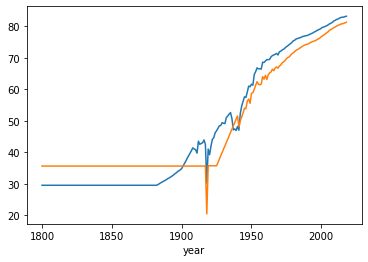

In [56]:
df2[df2.country=='Spain'].set_index('year').life_expectancy.plot()
df2[df2.country=='Portugal'].set_index('year').life_expectancy.plot()

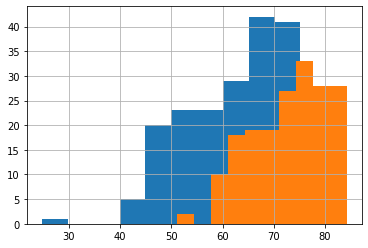

In [62]:
df2[df2.year=='1975'].life_expectancy.hist()
df2[df2.year=='2018'].life_expectancy.hist()

# Exercise

Build a dataframe with numeric exam marks for the following subjects and find out the student with more A's

- A: 9-10
- B: 7-8
- C: 5-6
- D: 0-4

In [63]:
subjects = ['history', 'english', 'math', 'biology', 'physics', 'chemistry']

In [67]:
# create dataframe
notas = pd.DataFrame(np.random.randint(3, 10, (20,6)))
notas.columns = subjects
notas['student'] = notas.index

In [68]:
notas.head()

,history,english,math,biology,physics,chemistry,student
0,3,3,9,8,5,9,0
1,3,3,5,7,5,6,1
2,5,7,7,7,6,5,2
3,7,3,5,5,7,3,3
4,8,9,8,9,9,6,4


In [70]:
# melt (id_vars, var_name, value_name)
notas = notas.melt(id_vars='student', var_name='subject', value_name='mark')

In [72]:
notas.groupby('subject').mean().sort_values('mark', ascending=False)

,student,mark
subject,,
biology,9.5,6.45
history,9.5,6.10
math,9.5,6.10
chemistry,9.5,6.00
physics,9.5,6.00
english,9.5,5.55


In [79]:
notas['calification'] = pd.cut(notas.mark,  bins=[0,5,7,9,10], labels= ['D','C','B','A'], right=False)
notas

,student,subject,mark,calification
0,0,history,3,D
1,1,history,3,D
2,2,history,5,C
3,3,history,7,B
4,4,history,8,B
...,...,...,...,...
115,15,chemistry,5,C
116,16,chemistry,8,B
117,17,chemistry,9,A
118,18,chemistry,5,C


In [93]:
notas

,student,subject,mark,calification
0,0,history,3,D
1,1,histori,3,D
2,2,history,5,C
3,3,history,7,B
4,4,history,8,B
...,...,...,...,...
115,15,chemistry,5,C
116,16,chemistry,8,B
117,17,chemistry,9,A
118,18,chemistry,5,C


In [115]:
# pivot index, columns, values, aggfunc, fill_value, sort
notas.pivot_table(index='student', columns='calification', values='subject', aggfunc='count', fill_value=0).sort_values(by='A',ascending=False)

calification,D,C,B,A
student,,,,
4,0,1,2,3
12,0,2,1,3
0,2,1,1,2
10,2,2,0,2
7,1,3,1,1
8,2,0,3,1
11,1,1,3,1
13,0,4,1,1
17,1,2,2,1


In [117]:
pd.crosstab(notas.student, notas.calification).sort_values(by='A',ascending=False)

calification,D,C,B,A
student,,,,
4,0,1,2,3
12,0,2,1,3
0,2,1,1,2
10,2,2,0,2
7,1,3,1,1
8,2,0,3,1
11,1,1,3,1
13,0,4,1,1
17,1,2,2,1


### Cleaning

We intentionally create an error

In [ ]:
notas.iloc[1,1] = 'histori'

### Check for spelling errors

In [130]:
notas.subject.unique()

array(['history', 'english', 'math', 'biology', 'physics', 'chemistry'],
      dtype=object)

In [131]:
notas.subject.value_counts()

math         20
history      20
biology      20
english      20
chemistry    20
physics      20
Name: subject, dtype: int64

### Replace with assignment

In [132]:
notas.loc[notas.subject=='histori','subject']='history'

### Replace with replace

In [99]:
notas.subject = notas.subject.replace('histori', 'history')

### Generate new columns based on conditions

In [134]:
notas['dificultad'] = np.where(notas.subject.str.contains('at'), 'difficult', 'easy')
notas

,student,subject,mark,calification,dificultad
0,0,history,3,D,easy
1,1,history,3,D,easy
2,2,history,5,C,easy
3,3,history,7,B,easy
4,4,history,8,B,easy
...,...,...,...,...,...
115,15,chemistry,5,C,easy
116,16,chemistry,8,B,easy
117,17,chemistry,9,A,easy
118,18,chemistry,5,C,easy
